## Setup

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

In [8]:
util.filter(summary, phase='phase_2')

,rand,nmi,oracle_rand,oracle_nmi,num_clusters,best_idx,aggregation,segregation,oracle_aggregation,oracle_segregation,iterations,method,d,p,k,r,id,file,phase
7000,0.940203,0.910174,0.948898,0.918609,3,885,0.959320,0.980519,0.965493,0.983215,1000,dpm_hybrid,5,1000,3,1.0,8ec1142a-5804-42eb-a1c6-311fd79146d6,"./phase_2/eval/dpm_hybrid/d=5,p=1000,k=3,r=1.0...",phase_2
7001,0.928110,0.903222,0.956193,0.935509,3,571,0.952377,0.975969,0.971217,0.985236,1000,dpm_hybrid,5,1000,3,1.0,a013ed17-2ffd-41a3-a8c6-d6d5de6390ed,"./phase_2/eval/dpm_hybrid/d=5,p=1000,k=3,r=1.0...",phase_2
7002,0.848011,0.782231,0.895879,0.843912,3,458,0.899809,0.948890,0.932070,0.964618,1000,dpm_hybrid,5,1000,3,1.0,b80d1555-f729-4606-9e48-2c992992be76,"./phase_2/eval/dpm_hybrid/d=5,p=1000,k=3,r=1.0...",phase_2
7003,0.973751,0.958040,0.968017,0.949166,3,557,0.982585,0.991241,0.978735,0.989350,1000,dpm_hybrid,5,1000,3,1.0,0f61ae6b-d270-4c03-90f9-83ed4a0d14da,"./phase_2/eval/dpm_hybrid/d=5,p=1000,k=3,r=1.0...",phase_2
7004,0.936882,0.898296,0.967417,0.942118,4,616,0.957634,0.979176,0.978943,0.988831,1000,dpm_hybrid,5,1000,3,1.0,3d0cf0ff-f353-42c9-ac20-268612dee146,"./phase_2/eval/dpm_hybrid/d=5,p=1000,k=3,r=1.0...",phase_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0.988859,0.977537,0.984957,0.971565,3,26,0.992542,0.996317,0.989940,0.995022,1000,mfm_hybrid,12,800,3,1.0,cdb3984c-4e48-4461-8ef0-d019a9ae761c,"./phase_2/eval/mfm_hybrid/d=12,p=800,k=3,r=1.0...",phase_2
12996,0.988750,0.977521,0.985043,0.970041,3,4,0.992566,0.996236,0.990100,0.995003,1000,mfm_hybrid,12,800,3,1.0,948e3f6f-b263-4bef-b4c5-e9f76a4c6c41,"./phase_2/eval/mfm_hybrid/d=12,p=800,k=3,r=1.0...",phase_2
12997,0.992459,0.984953,0.992459,0.984953,3,2,0.995005,0.997473,0.995005,0.997473,1000,mfm_hybrid,12,800,3,1.0,b37403ce-016b-4a35-a5f1-0be4cfaff945,"./phase_2/eval/mfm_hybrid/d=12,p=800,k=3,r=1.0...",phase_2
12998,0.981074,0.964031,0.973618,0.955343,3,50,0.987318,0.993751,0.982021,0.991443,1000,mfm_hybrid,12,800,3,1.0,52d3c5e1-ea0f-43a5-bd7d-f47a9d3abbd7,"./phase_2/eval/mfm_hybrid/d=12,p=800,k=3,r=1.0...",phase_2


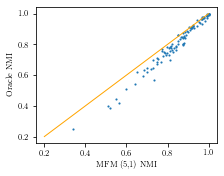

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

data = util.filter(summary, k=3, d=3, method='mfm_hybrid')
ax.scatter(data['oracle_nmi'], data['nmi'], marker='.', s=5)
ax.plot([0.2, 1], [0.2, 1], color='orange', linewidth=1)
ax.set_xlabel('MFM (5,1) NMI')
ax.set_ylabel('Oracle NMI')
fig.savefig('./plots/scatter_example.pdf', bbox_inches='tight')

In [152]:
import bmcc

BASE = 'd=8,p=1920,k=3,r=0.8/794c1531-6a0f-4d79-a89c-e4c004425d21.npz'

dataset = bmcc.GaussianMixture('./phase_1/data/' + BASE, load=True)
hist = np.load('./phase_1/results/dpm_eb_gibbs/' + BASE)['hist']

res = bmcc.LstsqResult(dataset.data, hist, burn_in=int(hist.shape[0] / 2))
res.evaluate(dataset.assignments, oracle=dataset.oracle, oracle_matrix=dataset.oracle_matrix)

# fig, ax = plt.subplots(1, 1)
# ax.plot(np.arange(hist.shape[0]) * 5, [np.max(x) for x in hist])
# ax.axhline(3, color='C1')
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Number of Clusters in Sample')

# fig.savefig('794c1531-6a0f-4d79-a89c-e4c004425d21_nc.pdf', bbox_inches='tight')

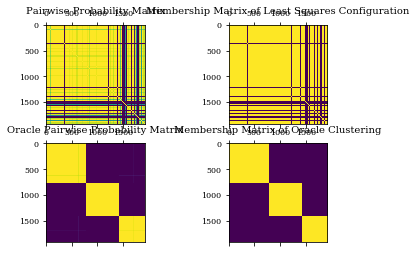

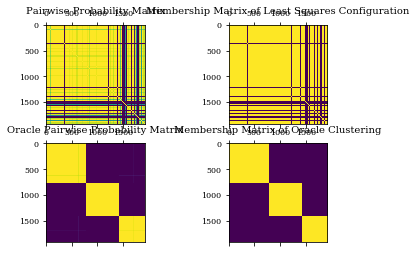

In [157]:
import matplotlib
matplotlib.rcParams.update({'text.usetex': False})

res.matrices()


\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/p1_boxplot_rand/d=3,p=720,k=3.pdf}
    \caption{Oracle Normalized Rand Score | 3 Dimensions, 3 Clusters (720 Points) | Boxplot of 100 Runs}
    \label{fig:rand_d3_k3_boxplot}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/p1_se_rand/d=3,p=720,k=3.pdf}
    \caption{Oracle Normalized Rand Score | 3 Dimensions, 3 Clusters (720 Points) | 2SE Intervals; arrow denotes intervals less than 0.8}
    \label{fig:rand_d3_k3_se}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/p1_boxplot_nmi/d=3,p=720,k=3.pdf}
    \caption{Oracle Normalized NMI | 3 Dimensions, 3 Clusters (720 Points) | Boxplot of 100 Runs}
    \label{fig:nmi_d3_k3_boxplot}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\textwidth]{plots/p1_se_nmi/d=3,p=720,k=3.pdf}
    \caption{Oracle Normalized NMI | 3 Dimensions, 3 Clusters (72

d       3
p    1200
k       5
Name: 200, dtype: uint16


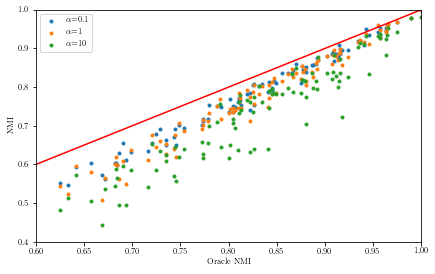

In [90]:


def scatter_alpha(t):

    fig, ax = plt.subplots(1, 1)

    minx = 1
    miny = 1
    for method, alpha in DPM_ALPHA_METHODS.items():
        df = filter(summary, method=method, **t)
        ax.scatter(df['oracle_nmi'], df['nmi'], marker='.', label=r"$\alpha$={}".format(alpha))
        minx = min(min(df['oracle_nmi']), minx)
        miny = min(min(df['nmi']), miny)

    st = max(minx, miny)
    ax.set_xlim(0.6, 1)
    ax.set_ylim(0.4, 1)
    ax.plot([st, 1], [st, 1], color='red')
    ax.set_xlabel('Oracle NMI')
    ax.set_ylabel('NMI')
    ax.legend()
    
    plt.savefig('d=3,p=1200,k=5,metric=nmi,plot=scatter.pdf', bbox_inches='tight')


scatter_alpha(TESTS.iloc[2])
print(TESTS.iloc[2])
    